In [1]:
import pandas as pd
import seaborn as sns
import statistics

data = pd.read_csv('titanic_train.csv')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


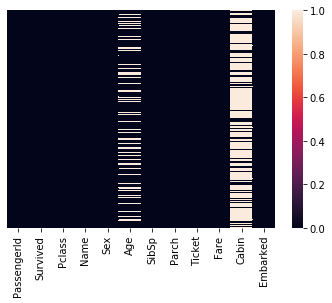

In [2]:
#data.head()
sns.heatmap(data.isnull(), yticklabels = False)
data.describe()

In [3]:
data = data.drop(labels = ['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)

In [4]:
i = 1
age_median = []
while i <= 3:
    p = data[data['Pclass'] == i]
    med = p['Age'].median()
    age_median.append(med)
    i += 1

print (age_median)

[37.0, 29.0, 24.0]


In [5]:
age_null = data['Age'].isnull()
for x in range(len(data)):
    i = 0
    while i <= 3:
        if (data['Pclass'][x] == i) & (age_null[x]):
            data['Age'][x] = age_median[i-1]
        i += 1

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
t1 = data[data['Pclass'] == 3]
print(sum(t1['Age'].isnull()))

0


In [7]:
data.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
sex = pd.get_dummies(data['Sex'], drop_first = True)
embarked = pd.get_dummies(data['Embarked'], drop_first = True)
data = data.drop(labels = ['Sex', 'Embarked'], axis = 1)
data = pd.concat([data, sex, embarked], axis = 1)
print(data.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1


## Split the database

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Survived', axis = 1),
                                                   data['Survived'], test_size = 0.3, 
                                                    random_state = 101)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [11]:
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for solver in solver_list:
    model = LogisticRegression(solver = solver)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    #print('multiclass: ' + mc)
    print('Solver: ' + solver)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Solver: newton-cg
[[134  20]
 [ 38  76]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

Solver: lbfgs
[[133  21]
 [ 38  76]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

Solver: liblinear
[[133  21]
 [ 40  74]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro 

/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


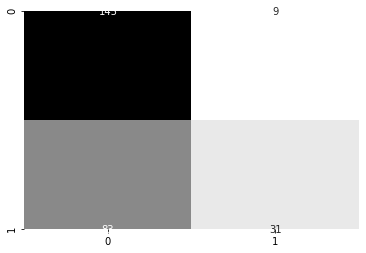

In [12]:
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cbar = False, annot = True, cmap = 'Greys', fmt = 'd')

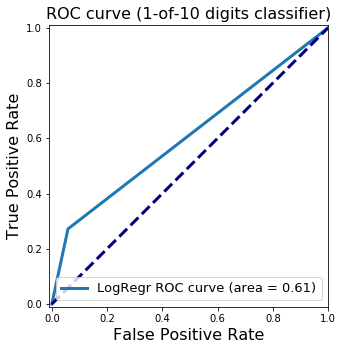

In [15]:
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
roc_auc_lr = auc(fpr_lr, tpr_lr)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()